In [1]:
import numpy as np
import pandas as pd
import random
# Apply horizontal scrolling for wide plots in notebooks
from IPython.display import display, HTML
display(HTML("<style>.output_scroll { overflow-x: auto; }</style>"))

In [2]:
# For visualization and analysis 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# For ML-based factor importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
# Setting a random seed for reproducibility
np.random.seed(42)
random.seed(42)

In [5]:
indian_states = [
    "Maharashtra", "Karnataka", "Tamil Nadu", "Delhi", "Gujarat",
    "West Bengal", "Punjab", "Kerala", "Rajasthan", "Uttar Pradesh"
]

state_cities = {
    "Maharashtra": ["Mumbai", "Pune", "Nagpur", "Nashik"],
    "Karnataka": ["Bengaluru", "Mysuru", "Mangalore"],
    "Tamil Nadu": ["Chennai", "Coimbatore", "Madurai"],
    "Delhi": ["New Delhi", "Delhi"],
    "Gujarat": ["Ahmedabad", "Surat", "Vadodara"],
    "West Bengal": ["Kolkata", "Darjeeling"],
    "Punjab": ["Chandigarh", "Ludhiana"],
    "Kerala": ["Kochi", "Thiruvananthapuram"],
    "Rajasthan": ["Jaipur", "Udaipur"],
    "Uttar Pradesh": ["Lucknow", "Kanpur", "Agra"]
}

In [8]:
# College types: arts, science, commerce, engineering, medical, other
college_types = ["arts", "science", "commerce", "engineering", "medical", "other"]

# Creating a City-Locality Category Mapping DataFrame
# We assign each city a locality category: "poor", "median", "rich"
city_records = []
locality_categories = ["poor", "median", "rich"]

for state, cities in state_cities.items():
    for city in cities:
        category = random.choices(locality_categories, weights=[0.3, 0.5, 0.2])[0]
        city_records.append({"State": state, "City": city, "Locality_Category": category})

df_city = pd.DataFrame(city_records)

# Saving this mapping as a separate Excel sheet
with pd.ExcelWriter("college_data.xlsx") as writer:
    df_city.to_excel(writer, sheet_name="City_Locality", index=False)

In [9]:
df_city

,State,City,Locality_Category
0,Maharashtra,Mumbai,poor
1,Maharashtra,Pune,poor
2,Maharashtra,Nagpur,rich
3,Maharashtra,Nashik,median
4,Karnataka,Bengaluru,rich
5,Karnataka,Mysuru,median
6,Karnataka,Mangalore,median
7,Tamil Nadu,Chennai,rich
8,Tamil Nadu,Coimbatore,median
9,Tamil Nadu,Madurai,median


In [10]:
# Generating the Synthetic College Dataset (1,000 colleges)
n = 1000
college_records = []

for i in range(1, n+1):
    # Fake college name
    college_name = f"Institute of Higher Learning #{i}"
    
    # Randomly choosing a state and then a city within that state
    state = random.choice(indian_states)
    city = random.choice(state_cities[state])
    
    # Looking up locality category from df_city
    loc_category = df_city[(df_city["State"] == state) & (df_city["City"] == city)]["Locality_Category"].values[0]
    
    # Economic location score (1-100). Assuming that cities with "rich" category tend to have higher economic scores.
    if loc_category == "rich":
        economic_location = np.random.randint(70, 101)
    elif loc_category == "median":
        economic_location = np.random.randint(40, 81)
    else:
        economic_location = np.random.randint(1, 61)

    # Locality quality score (1-10) could also reflect the city category.
    if loc_category == "rich":
        locality_score = np.random.randint(7, 11)
    elif loc_category == "median":
        locality_score = np.random.randint(4, 9)
    else:
        locality_score = np.random.randint(1, 7)


    # Tuition fees in INR (in thousands)
    # Let tuition vary by college type: engineering/medical may be higher
    college_type = random.choice(college_types)
    if college_type == "engineering":
        tuition_fees = round(np.random.uniform(150, 300), 2)  # in thousands; 1.5 to 3 lakhs per year
    elif college_type == "medical":
        tuition_fees = round(np.random.uniform(400, 700), 2)  # 4 to 7 lakhs per year
    else:
        tuition_fees = round(np.random.uniform(50, 200), 2)  # 50k to 200k
    
    # Facilities score (1-10)
    facilities_score = np.random.randint(1, 11)
    
    # Academic Excellence score (1-10)
    academic_excellence = np.random.randint(1, 11)
    
    # Sports Excellence score (1-10)
    sports_excellence = np.random.randint(1, 11)
    
    # Number of students. We generate different ranges.
    # Some colleges will have 250-500 students and others more.
    student_cat = random.choices(["small", "medium", "large"], weights=[0.3, 0.4, 0.3])[0]
    if student_cat == "small":
        num_students = np.random.randint(250, 501)
    elif student_cat == "medium":
        num_students = np.random.randint(500, 1001)
    else:
        num_students = np.random.randint(1000, 5001)  # up to 5000 students

    college_records.append({
        "College_ID": i,
        "College_Name": college_name,
        "State": state,
        "City": city,
        "Locality_Category": loc_category,  # from our city mapping
        "Economic_Location": economic_location,
        "Locality_Score": locality_score,
        "Tuition_Fees": tuition_fees,  # in thousands
        "Facilities_Score": facilities_score,
        "Academic_Excellence": academic_excellence,
        "Sports_Excellence": sports_excellence,
        "Number_of_Students": num_students,
        "College_Type": college_type
    })

df_colleges = pd.DataFrame(college_records)

# Save the main dataset to a new sheet in the same Excel file
with pd.ExcelWriter("college_data.xlsx", mode="a", engine="openpyxl") as writer:
    df_colleges.to_excel(writer, sheet_name="Colleges", index=True)


In [11]:
df_colleges

,College_ID,College_Name,State,City,Locality_Category,Economic_Location,Locality_Score,Tuition_Fees,Facilities_Score,Academic_Excellence,Sports_Excellence,Number_of_Students,College_Type
0,1,Institute of Higher Learning #1,Gujarat,Vadodara,median,78,7,192.61,8,5,7,621,other
1,2,Institute of Higher Learning #2,Uttar Pradesh,Agra,poor,19,3,118.89,5,4,8,651,science
2,3,Institute of Higher Learning #3,Delhi,New Delhi,rich,72,8,158.46,8,6,2,691,engineering
3,4,Institute of Higher Learning #4,Rajasthan,Jaipur,poor,60,5,142.62,10,6,9,548,other
4,5,Institute of Higher Learning #5,Maharashtra,Pune,poor,27,3,109.98,3,7,4,3879,arts
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Institute of Higher Learning #996,Karnataka,Mangalore,median,73,5,105.40,10,1,8,412,arts
996,997,Institute of Higher Learning #997,Karnataka,Mysuru,median,78,5,239.67,6,7,6,631,engineering
997,998,Institute of Higher Learning #998,Rajasthan,Udaipur,median,48,7,225.70,2,1,8,4815,engineering
998,999,Institute of Higher Learning #999,Delhi,New Delhi,rich,92,8,55.76,8,3,2,938,commerce


In [12]:
# Defining a Rule-Based Grant Assignment Function
def assign_grant(row):
    # Starting with a composite score from normalized factors.
    norm_economic = (row["Economic_Location"] - 1) / (100 - 1)
    norm_locality = (row["Locality_Score"] - 1) / (10 - 1)
    norm_tuition = 1 - ((row["Tuition_Fees"] - 50) / (700 - 50))  # tuition in thousands, scale from 50 to 700
    norm_facilities = (row["Facilities_Score"] - 1) / (10 - 1)
    norm_academic = (row["Academic_Excellence"] - 1) / (10 - 1)
    norm_sports = (row["Sports_Excellence"] - 1) / (10 - 1)
    
    # Base composite score 
    composite = (0.15 * norm_economic +
                 0.15 * norm_locality +
                 0.20 * norm_tuition +
                 0.15 * norm_facilities +
                 0.20 * norm_academic +
                 0.15 * norm_sports)
    
    # Starting with a preliminary grant level based on composite score thresholds
    if composite < 0.2:
        grant = 0
    elif composite < 0.35:
        grant = 1
    elif composite < 0.5:
        grant = 2
    elif composite < 0.65:
        grant = 3
    elif composite < 0.8:
        grant = 4
    elif composite < 0.9:
        grant = 5
    else:
        grant = 6
    
    # Additional domain-specific rules:
    if (row["Locality_Category"] == "rich") or (row["Economic_Location"] > 80):
        if grant > 3:
            grant = 3
    
    high_academic = row["Academic_Excellence"] >= 8
    high_sports = row["Sports_Excellence"] >= 8
    if high_academic and high_sports:
        if grant < 4:
            grant = 4
    elif high_academic or high_sports:
        if grant < 3:
            grant = 3
    
    if 250 <= row["Number_of_Students"] <= 500:
        if grant > 2:
            grant = 2
    else:
        if grant < 3:
            grant = 3
    
    if row["College_Type"] in ["engineering", "medical"]:
        if row["College_Type"] == "engineering":
            if row["Tuition_Fees"] <= 200 and grant < 2:
                grant = 2
        elif row["College_Type"] == "medical":
            if row["Tuition_Fees"] <= 500 and grant < 2:
                grant = 2
    
    return grant

# Applying the Rule-Based Function to Assign Grant Levels
df_colleges["Grant_Level"] = df_colleges.apply(assign_grant, axis=1)

# Display a summary count of grant levels
print("Grant Level Distribution:")
print(df_colleges["Grant_Level"].value_counts().sort_index())

# Saving the Updated Dataset with Grant Levels
with pd.ExcelWriter("college_data.xlsx", mode="a", engine="openpyxl") as writer:
    df_colleges.to_excel(writer, sheet_name="Colleges_with_Grants", index=False)


Grant Level Distribution:
Grant_Level
1     15
2    297
3    572
4    112
5      4
Name: count, dtype: int64


In [13]:
# Factor Importance Analysis
features = ["Economic_Location", "Locality_Score", "Tuition_Fees",
            "Facilities_Score", "Academic_Excellence", "Sports_Excellence", "Number_of_Students"]

X = df_colleges[features]
y = df_colleges["Grant_Level"]

# Compute the correlation matrix with the target
corr = df_colleges[features + ["Grant_Level"]].corr()
print("Correlation of features with Grant_Level:")
print(corr["Grant_Level"].sort_values(ascending=False))

Correlation of features with Grant_Level:
Grant_Level            1.000000
Number_of_Students     0.431589
Academic_Excellence    0.196350
Sports_Excellence      0.154678
Facilities_Score       0.121537
Locality_Score         0.030099
Economic_Location      0.001800
Tuition_Fees          -0.046424
Name: Grant_Level, dtype: float64


In [14]:
def calculate_grant(row):
    # Initial grant computation logic
    grant = 0  # Example initial value; replace with your logic
    
    # Apply the additional domain-specific rules:
    
    # 1. Rich locality or rich economic area: max grant capped at 3.
    if (row["Locality_Category"] == "rich") or (row["Economic_Location"] > 80):
        if grant > 3:
            grant = 3

    # 2. High academic or high sports (score >= 8) can be considered for higher grant levels.
    #    If both are high (>= 8), then ensure at least level 4.
    high_academic = row["Academic_Excellence"] >= 8
    high_sports = row["Sports_Excellence"] >= 8
    if high_academic and high_sports:
        if grant < 4:
            grant = 4
    elif high_academic or high_sports:
        # Allow grant level 3 or above if not already low.
        if grant < 3:
            grant = 3

    # 3. Based on number of students:
    #    - Colleges with 250-500 students: grant level must be in {0,1,2}
    #    - Colleges with >=500 students: grant level in {3,4,5,6}
    if 250 <= row["Number_of_Students"] <= 500:
        if grant > 2:
            grant = 2
    else:
        if grant < 3:
            grant = 3

    # 4. Engineering and medical colleges rule:
    if row["College_Type"] in ["engineering", "medical"]:
        if row["College_Type"] == "engineering":
            # Unless tuition fees > 200 (i.e., 2 lakhs), they should not have grant 0 or 1.
            if row["Tuition_Fees"] <= 200 and grant < 2:
                grant = 2
        elif row["College_Type"] == "medical":
            # Unless tuition fees > 500 (i.e., 5 lakhs), they should not have grant 0 or 1.
            if row["Tuition_Fees"] <= 500 and grant < 2:
                grant = 2

    return grant


In [15]:
df_colleges["Grant_Level"] = df_colleges.apply(calculate_grant, axis=1)


In [16]:
df_colleges

,College_ID,College_Name,State,City,Locality_Category,Economic_Location,Locality_Score,Tuition_Fees,Facilities_Score,Academic_Excellence,Sports_Excellence,Number_of_Students,College_Type,Grant_Level
0,1,Institute of Higher Learning #1,Gujarat,Vadodara,median,78,7,192.61,8,5,7,621,other,3
1,2,Institute of Higher Learning #2,Uttar Pradesh,Agra,poor,19,3,118.89,5,4,8,651,science,3
2,3,Institute of Higher Learning #3,Delhi,New Delhi,rich,72,8,158.46,8,6,2,691,engineering,3
3,4,Institute of Higher Learning #4,Rajasthan,Jaipur,poor,60,5,142.62,10,6,9,548,other,3
4,5,Institute of Higher Learning #5,Maharashtra,Pune,poor,27,3,109.98,3,7,4,3879,arts,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Institute of Higher Learning #996,Karnataka,Mangalore,median,73,5,105.40,10,1,8,412,arts,2
996,997,Institute of Higher Learning #997,Karnataka,Mysuru,median,78,5,239.67,6,7,6,631,engineering,3
997,998,Institute of Higher Learning #998,Rajasthan,Udaipur,median,48,7,225.70,2,1,8,4815,engineering,3
998,999,Institute of Higher Learning #999,Delhi,New Delhi,rich,92,8,55.76,8,3,2,938,commerce,3


In [17]:
# Factor Importance Analysis
features = ["Economic_Location", "Locality_Score", "Tuition_Fees",
            "Facilities_Score", "Academic_Excellence", "Sports_Excellence", "Number_of_Students"]

X = df_colleges[features]
y = df_colleges["Grant_Level"]

# Compute the correlation matrix with the target
corr = df_colleges[features + ["Grant_Level"]].corr()
print("Correlation of features with Grant_Level:")
print(corr["Grant_Level"].sort_values(ascending=False))

Correlation of features with Grant_Level:
Grant_Level            1.000000
Number_of_Students     0.420948
Academic_Excellence    0.223837
Sports_Excellence      0.185507
Tuition_Fees           0.051103
Facilities_Score       0.042902
Locality_Score         0.011376
Economic_Location     -0.019940
Name: Grant_Level, dtype: float64


In [18]:
# Display a summary count of grant levels
print("Grant Level Distribution:")
print(df_colleges["Grant_Level"].value_counts().sort_index())

Grant Level Distribution:
Grant_Level
0    138
2    174
3    626
4     62
Name: count, dtype: int64


In [19]:
# ML-based Feature Importance using Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           2       1.00      0.94      0.97        36
           3       1.00      1.00      1.00       119
           4       1.00      1.00      1.00        16

    accuracy                           0.99       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.99      0.99       200



In [20]:
# Getting feature importances
feature_importances = pd.Series(rf.feature_importances_, index=features)
feature_importances = feature_importances.sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)

Feature Importances:
Number_of_Students     0.565467
Academic_Excellence    0.154353
Sports_Excellence      0.147668
Tuition_Fees           0.046850
Economic_Location      0.038282
Locality_Score         0.023880
Facilities_Score       0.023499
dtype: float64


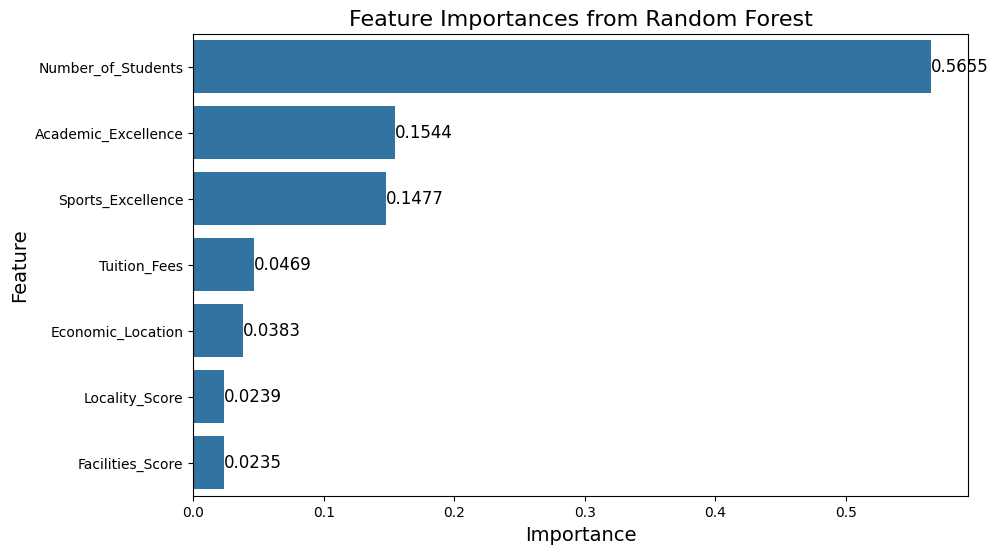

In [21]:

# Sorting the feature importances (if not already sorted)
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_sorted.values, y=feature_importances_sorted.index)

# Adding the numbers on top of each bar
for index, value in enumerate(feature_importances_sorted.values):
    plt.text(value, index, f'{value:.4f}', va='center', ha='left', fontsize=12)

# Adding title and labels
plt.title("Feature Importances from Random Forest", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)

plt.show()


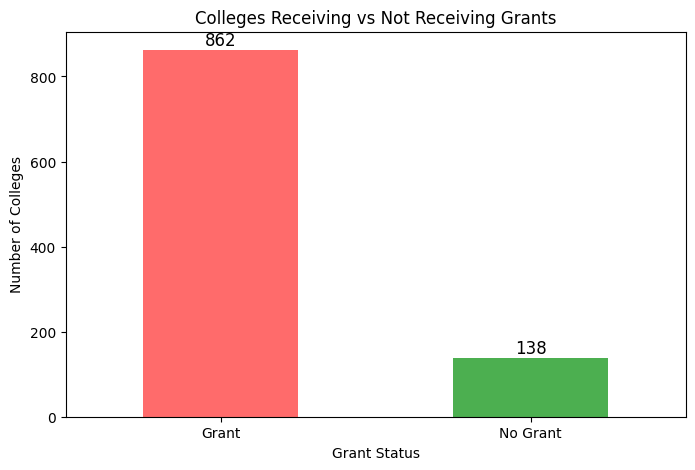

In [26]:


# Group the data based on Grant_Level (0 for no grant, 1-6 for grant)
grant_counts = df_colleges['Grant_Level'].apply(lambda x: 'No Grant' if x == 0 else 'Grant').value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 5))
grant_counts.plot(kind='bar', color=['#FF6B6B', '#4CAF50'])
plt.title('Colleges Receiving vs Not Receiving Grants')
plt.xlabel('Grant Status')
plt.ylabel('Number of Colleges')
plt.xticks(rotation=0)
for i, count in enumerate(grant_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12, )
plt.show()
